<a href="https://colab.research.google.com/github/Kimsg130/McuAnalyze-project/blob/main/MCUAnalyze.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MCU 박스오피스 성적으로 보는 전망 예측

In [3]:
!pip install plotly chart_studio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 2.1 MB/s eta 0:00:00


# Init

In [36]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn")
sns.set(font_scale = 1)
sns.set_style("whitegrid")

import plotly.express as px

import chart_studio.plotly as py
import cufflinks as cf
cf.go_offline(connected=True)

import plotly.graph_objects as go
import plotly.offline as pyo
pyo.init_notebook_mode()

from plotly.subplots import make_subplots

import missingno as msno

import warnings
warnings.filterwarnings(action='ignore')

plt.rcParams['axes.unicode_minus'] = False    # - 기호 깨짐 해결

# Google Drive Mount

In [8]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


# DataSet 불러오기

In [15]:
mcu = pd.read_csv("/content/drive/MyDrive/datasets/mcu/mcuDataSet.csv", sep='|')

print(mcu.shape)
mcu.head()

(33, 6)


Release Date                           Title Production Budget  \
0  Nov 10, 2023                     The Marvels      $274,800,000   
1   May 5, 2023   Guardians of the Galaxy Vol 3      $250,000,000   
2  Feb 17, 2023    Ant-Man and the Wasp: Quant…      $200,000,000   
3  Nov 11, 2022  Black Panther: Wakanda Forever      $250,000,000   
4   Jul 8, 2022          Thor: Love and Thunder      $250,000,000   

  Opening Weekend Domestic Box Office Worldwide Box Office  
0     $46,110,859         $78,861,186         $189,033,581  
1    $118,414,021        $358,995,815         $845,468,744  
2    $106,109,650        $214,506,909         $463,635,303  
3    $181,339,761        $453,829,060         $853,985,546  
4    $144,165,107        $343,256,830         $760,928,081

# 가져온 데이터 요약

In [17]:
print("전체 데이터 수:", mcu.shape[0] * mcu.shape[1])
print("결측치 수: {} / 전체 데이터의 {:.2f}%".format(mcu.isnull().sum().sum(), (mcu.isnull().sum().sum()*100) / (mcu.shape[0] * mcu.shape[1])))
print("전체 작품 수: ", mcu["Title"].nunique())

전체 데이터 수: 198
결측치 수: 0 / 전체 데이터의 0.00%
전체 작품 수:  33


# 데이터 전처리

In [34]:
nf = mcu

# 제작비 numeric type으로 parse
nf["Production Budget"] = nf["Production Budget"].str.replace("$", "")
nf["Production Budget"] = nf["Production Budget"].str.replace(",", "")
nf["Production Budget"] = pd.to_numeric(nf["Production Budget"])

# 개봉 첫 주 성적 numeric type으로 parse
nf['Opening Weekend'] = nf['Opening Weekend'].str.replace("$", "")
nf['Opening Weekend'] = nf['Opening Weekend'].str.replace(",", "")
nf['Opening Weekend'] = pd.to_numeric(nf['Opening Weekend'])

# 내수 시장 박스오피스 성적 numeric type으로 parse
nf['Domestic Box Office'] = nf['Domestic Box Office'].str.replace("$", "")
nf['Domestic Box Office'] = nf['Domestic Box Office'].str.replace(",", "")
nf['Domestic Box Office'] = pd.to_numeric(nf['Domestic Box Office'])

# 전세계 박스오피스 성적 numeric type으로 parse
nf['Worldwide Box Office'] = nf['Worldwide Box Office'].str.replace("$", "")
nf['Worldwide Box Office'] = nf['Worldwide Box Office'].str.replace(",", "")
nf['Worldwide Box Office'] = pd.to_numeric(nf['Worldwide Box Office'])

# 데이터 시각화

## 제작비 추세

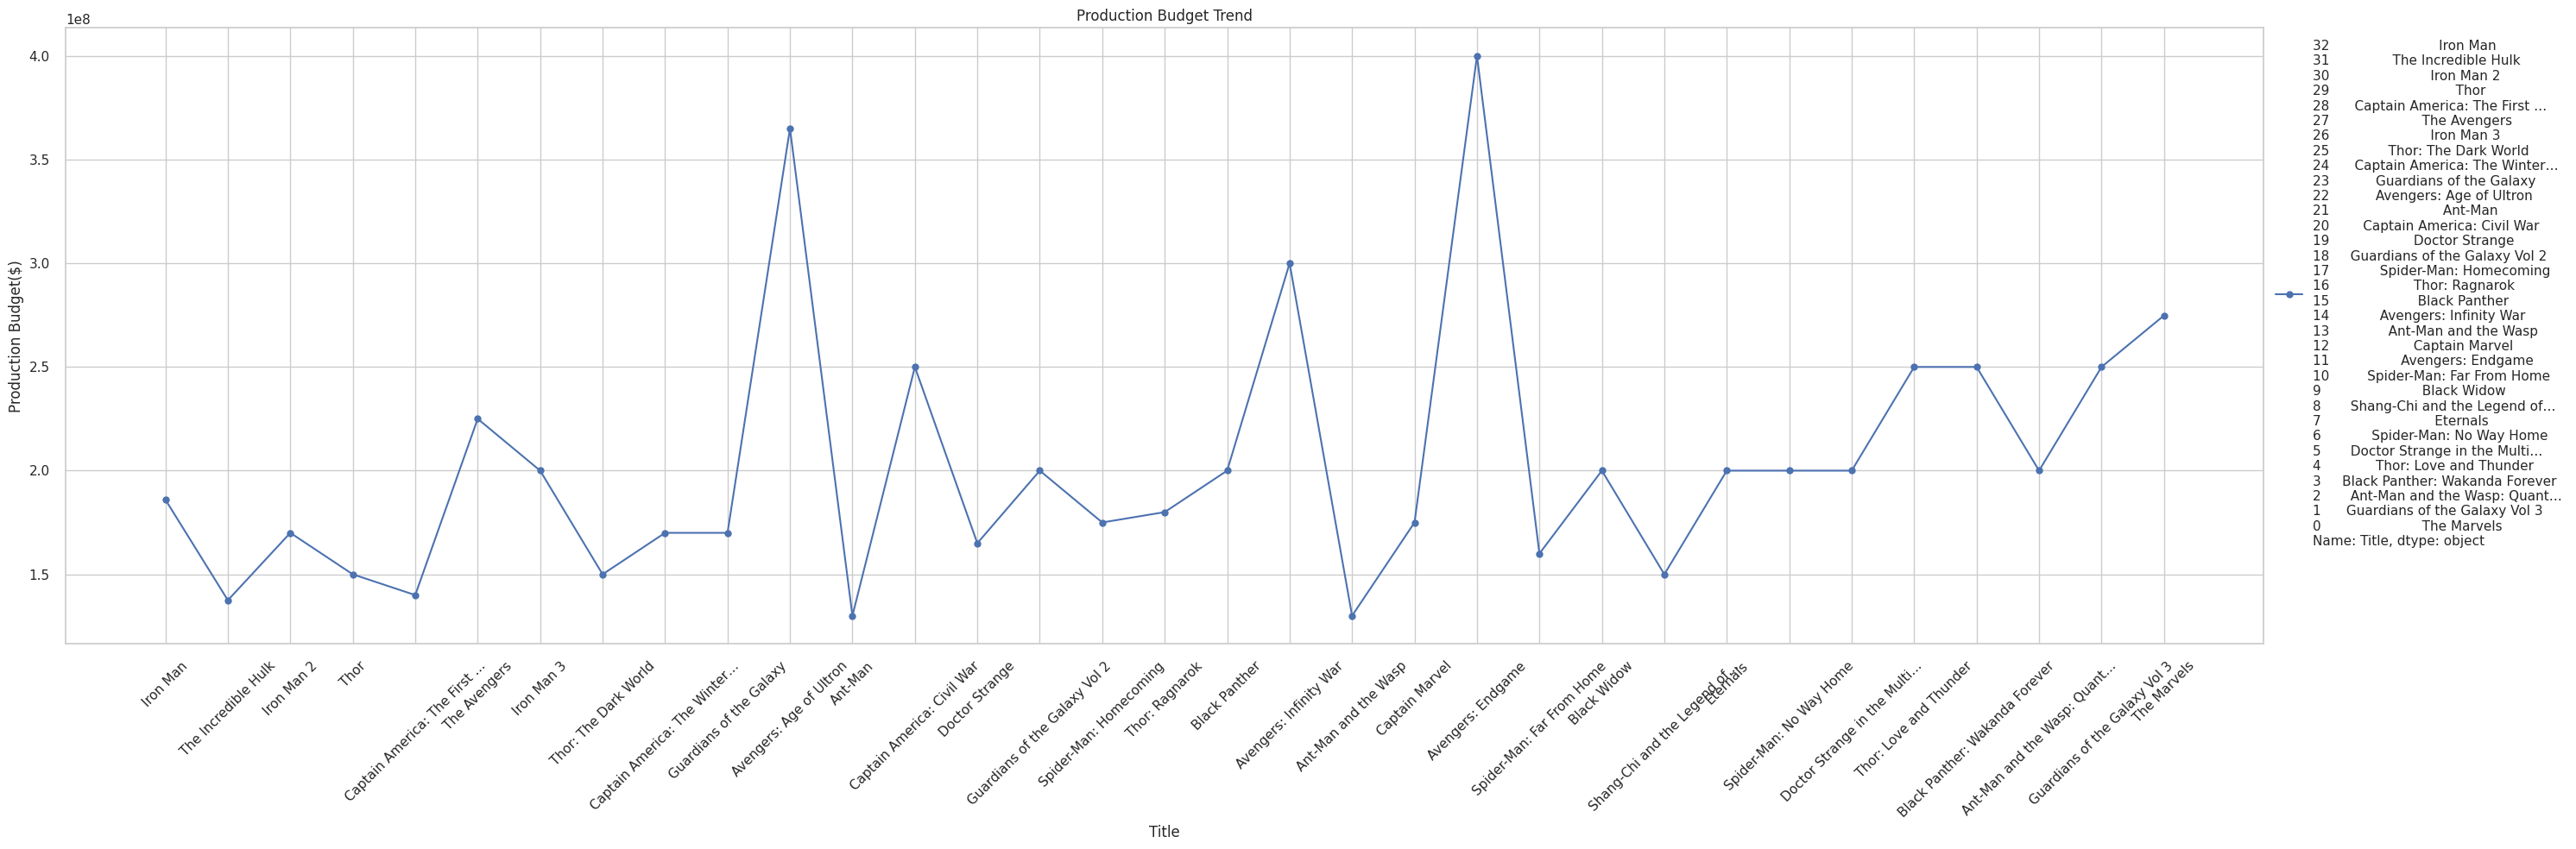

In [64]:
# 그래프 생성 및 시각화
nf_data = nf.iloc[::-1]

plt.figure(figsize=(30, 10))

plt.plot(nf_data['Title'], nf_data['Production Budget'], marker='o', label=nf_data['Title'])

plt.xlabel('Title')
plt.ylabel('Production Budget($)')
plt.title('Production Budget Trend')
plt.legend(bbox_to_anchor=(1,1))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 개봉 첫주 성적

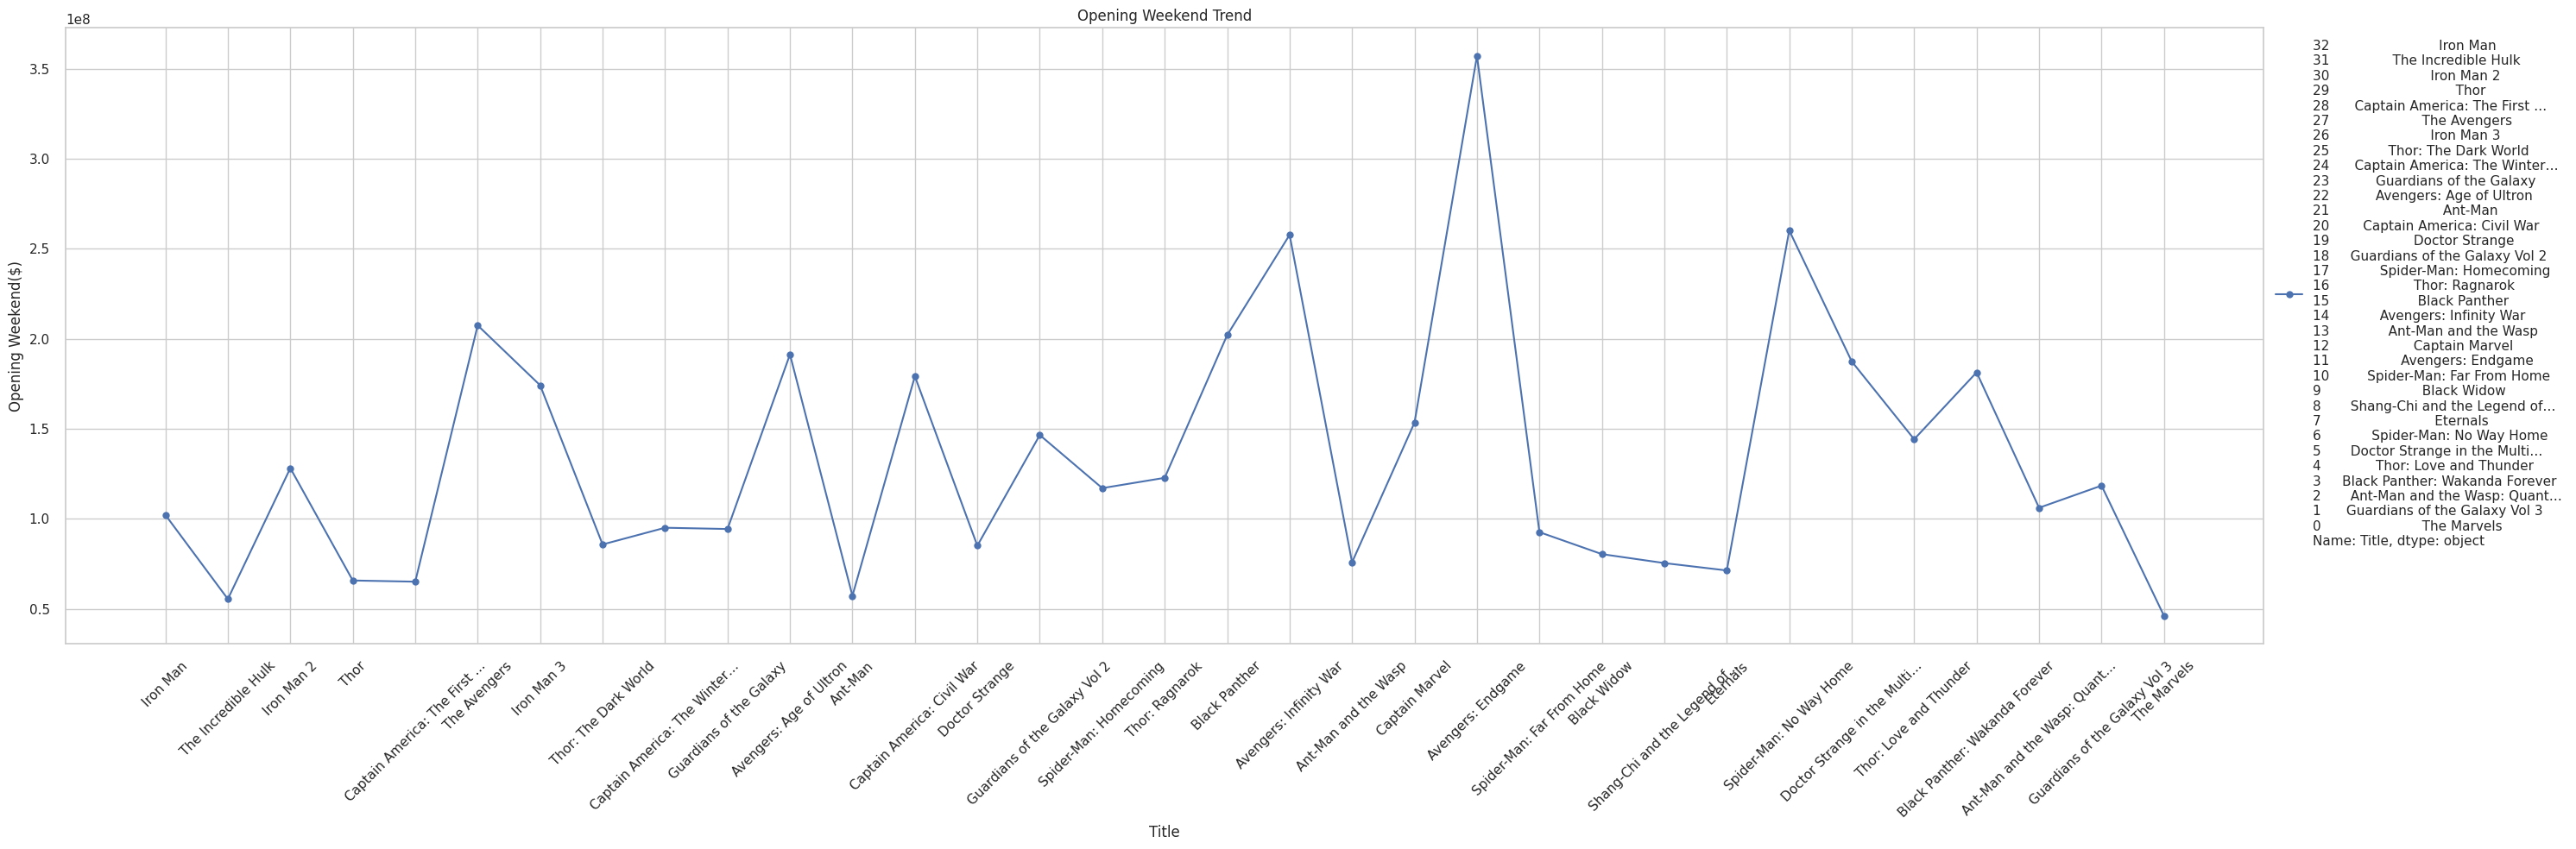

In [61]:
# 그래프 생성 및 시각화 (선 그래프)
plt.figure(figsize=(30, 10))

plt.plot(nf_data['Title'], nf_data['Opening Weekend'], marker='o', label=nf_data['Title'])

plt.xlabel('Title')
plt.ylabel('Opening Weekend($)')
plt.title('Opening Weekend Trend')
plt.legend(bbox_to_anchor=(1,1))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 내수 시장 박스 오피스 성적(Hollywood)

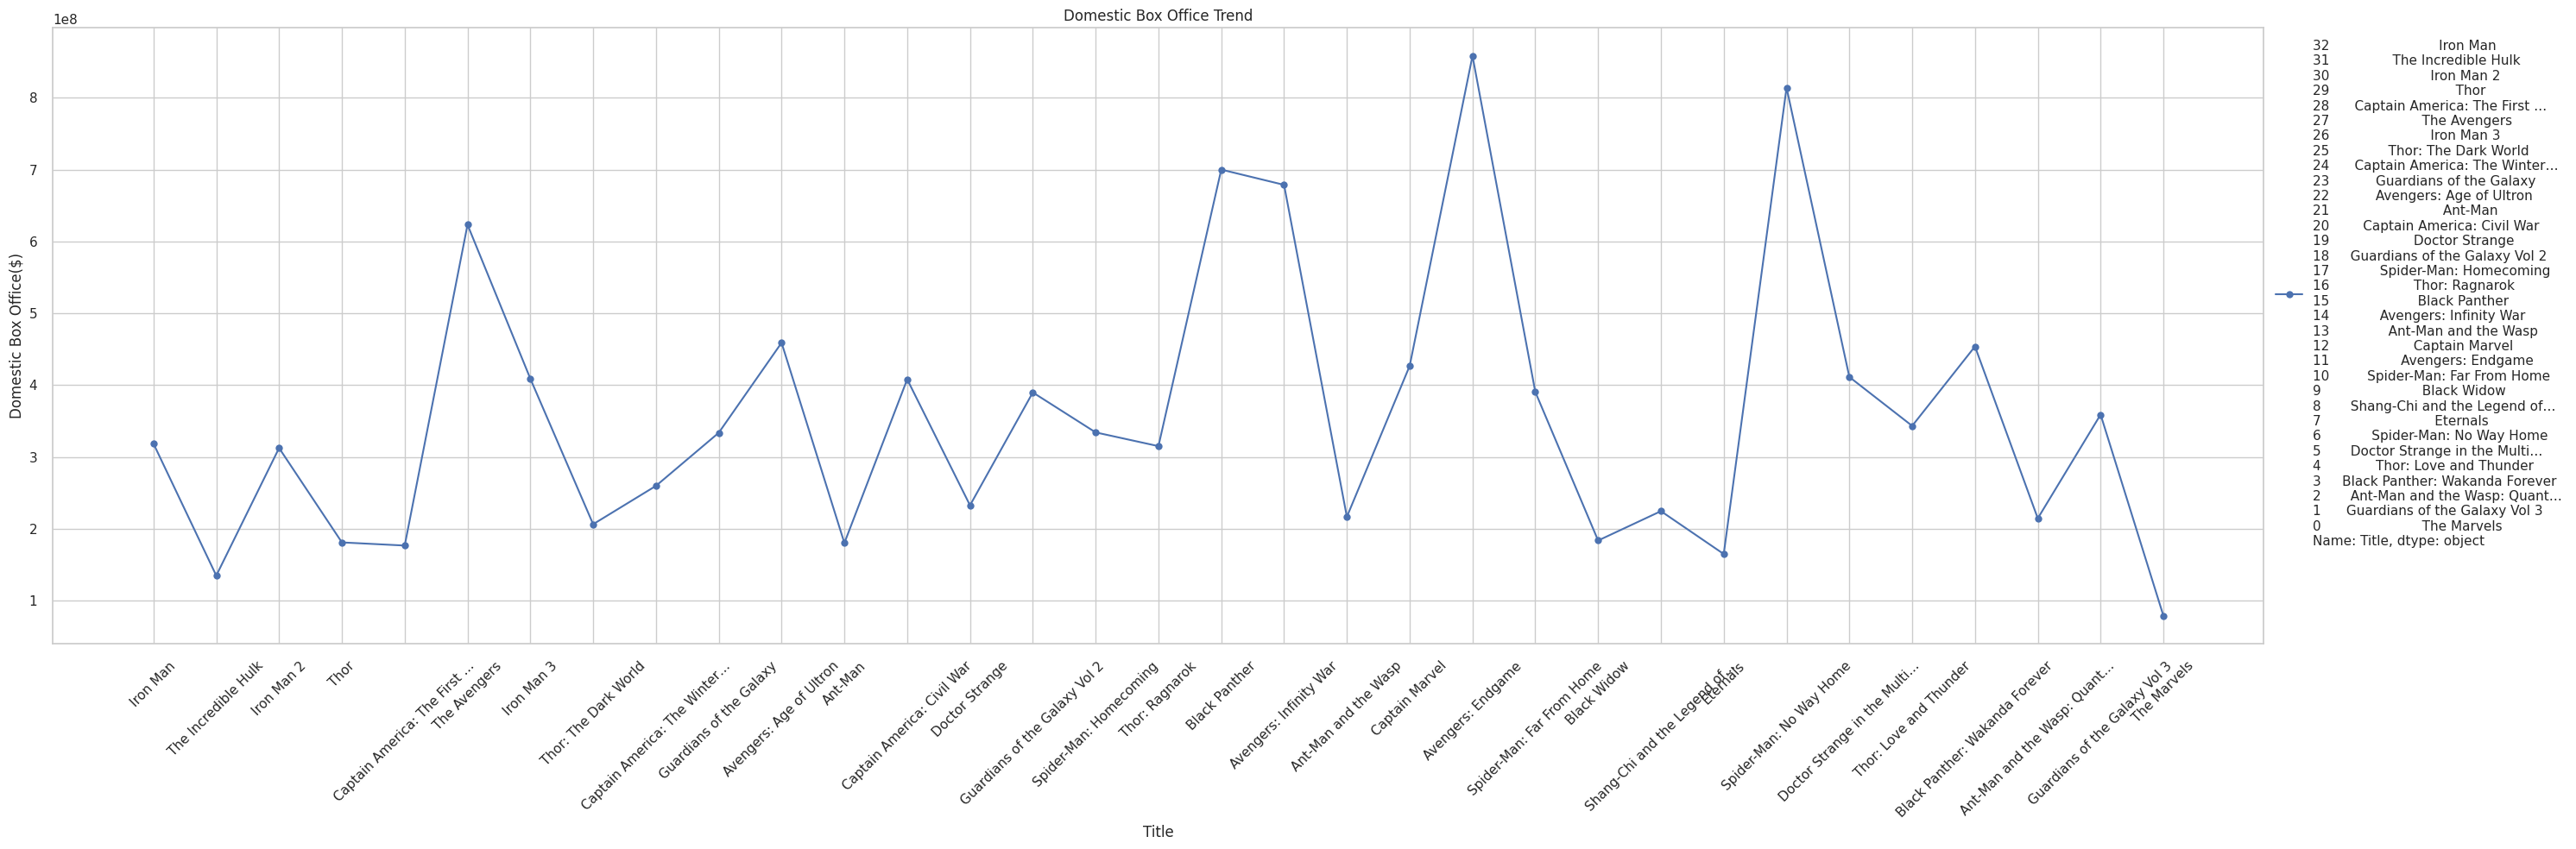

In [62]:
# 그래프 생성 및 시각화 (선 그래프)
plt.figure(figsize=(30, 10))

plt.plot(nf_data['Title'], nf_data['Domestic Box Office'], marker='o', label=nf_data['Title'])

plt.xlabel('Title')
plt.ylabel('Domestic Box Office($)')
plt.title('Domestic Box Office Trend')
plt.legend(bbox_to_anchor=(1,1))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 전세계 박스 오피스 성적

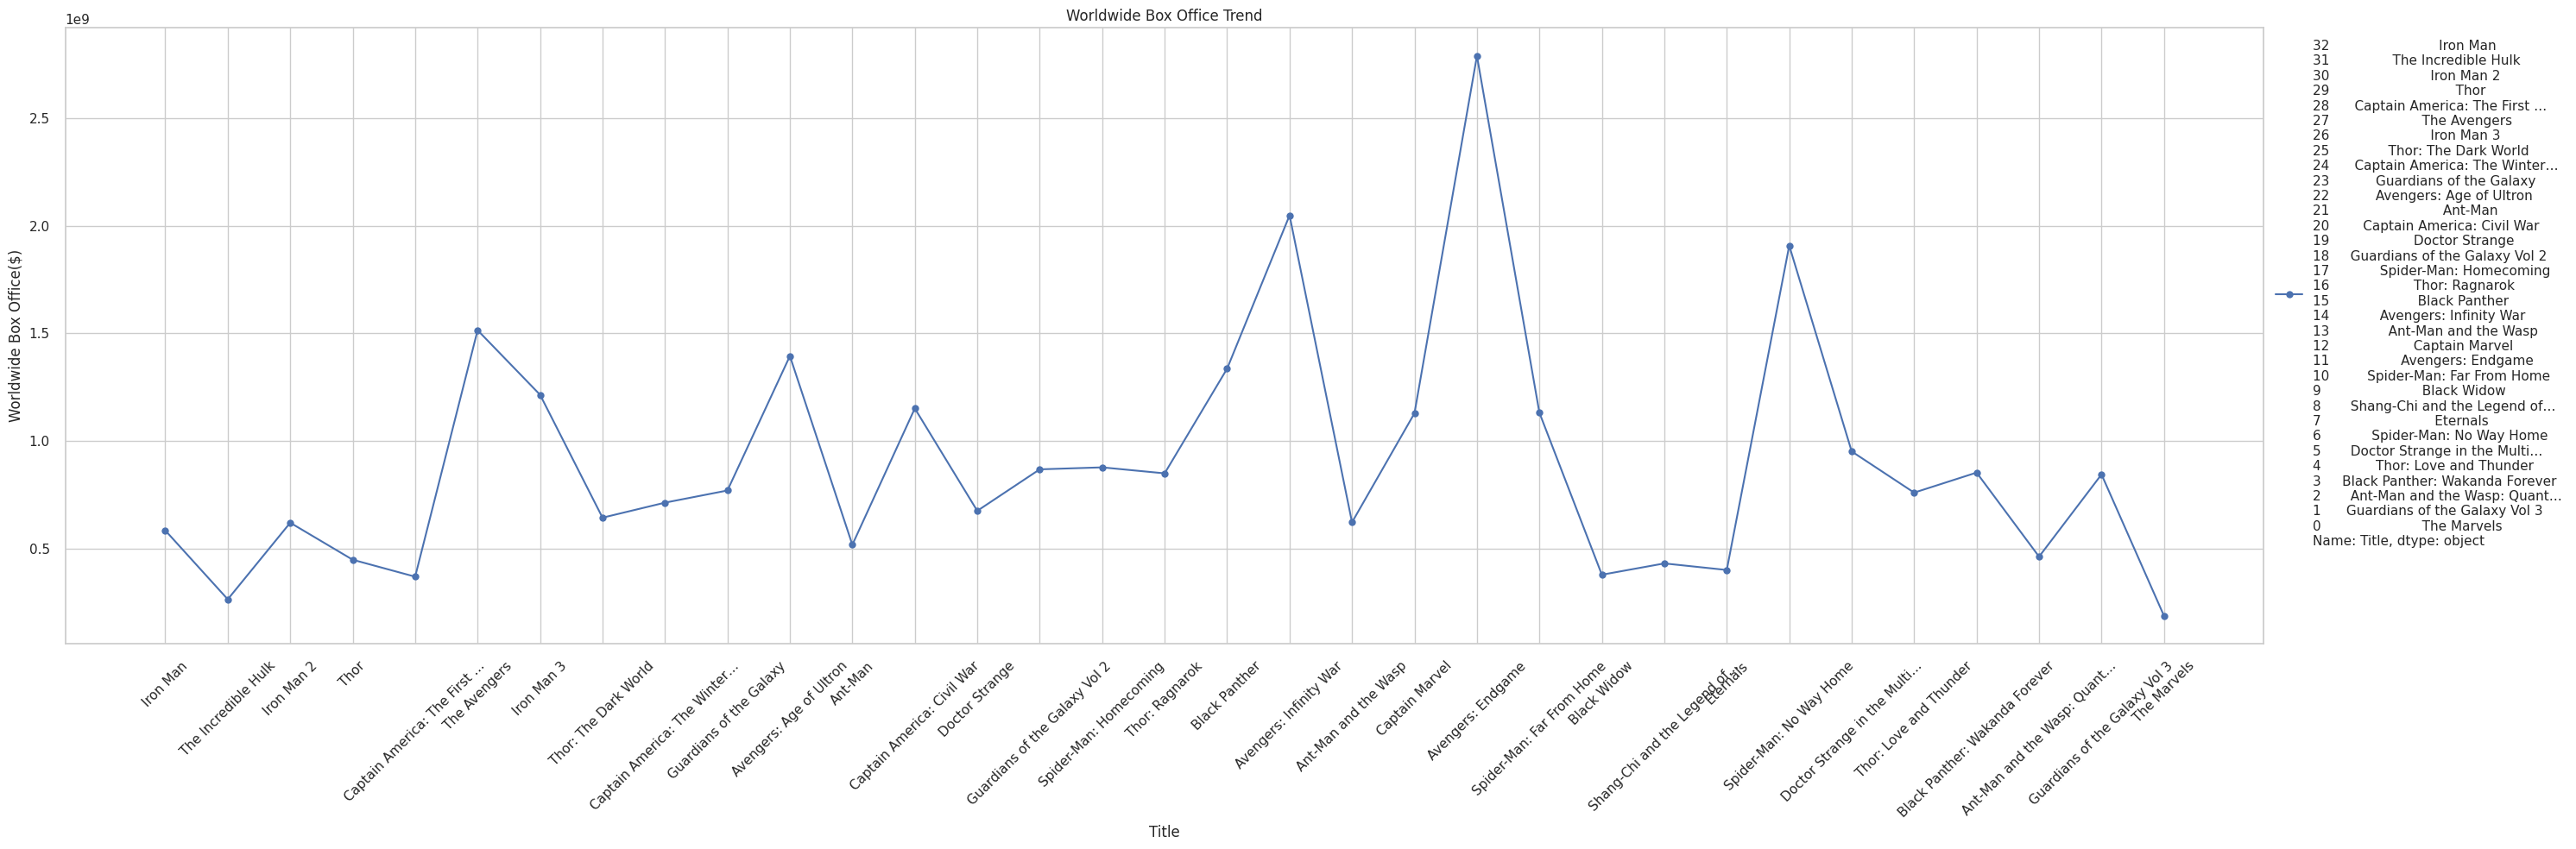

In [63]:
# 그래프 생성 및 시각화 (선 그래프)
plt.figure(figsize=(30, 10))

plt.plot(nf_data['Title'], nf_data['Worldwide Box Office'], marker='o', label=nf_data['Title'])

plt.xlabel('Title')
plt.ylabel('Worldwide Box Office($)')
plt.title('Worldwide Box Office Trend')
plt.legend(bbox_to_anchor=(1,1))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()